# Load Packages & Dataset

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

import tensorflow as tf
import sklearn as sk
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier as RF

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


from sklearn import svm, model_selection, linear_model, ensemble 



In [2]:
feature = pd.read_csv('C:/Users/18701/Downloads/training_set_features.csv',index_col="respondent_id")
label = pd.read_csv('C:/Users/18701/Downloads/training_set_labels.csv',index_col="respondent_id")

test_feature = pd.read_csv('C:/Users/18701/Downloads/test_set_features.csv',index_col="respondent_id")

In [3]:
feature.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
label.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
test_feature.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
print("Train Shape : ",feature.shape)
print("Test Shape : ",test_feature.shape)
print("Label Shape : ",label.shape)

Train Shape :  (26707, 35)
Test Shape :  (26708, 35)
Label Shape :  (26707, 2)


# EDA

In [7]:
F = feature
L = label
frames = [F,L]
data = pd.concat(frames,axis=1)

data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


## The number of people who took each vaccine

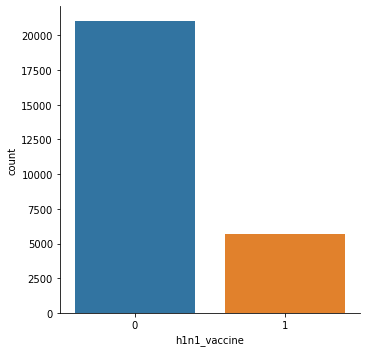

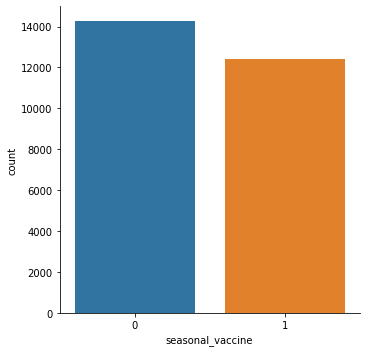

In [8]:
sns.factorplot('h1n1_vaccine',data=data,kind='count')
sns.factorplot('seasonal_vaccine',data=data,kind='count')

## The gender distribution of the data 


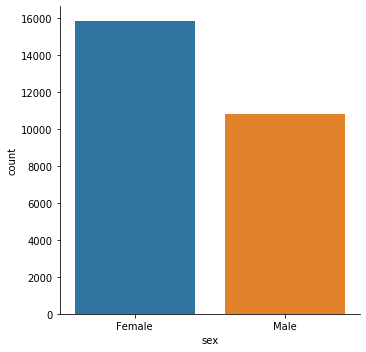

In [9]:
sns.factorplot('sex',data=data,kind='count')


## The number of people in each category of concern

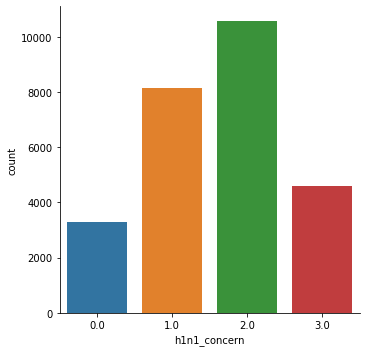

In [10]:
sns.factorplot('h1n1_concern',kind = 'count',data = data)

## Behavior features

In [11]:
data['behavioral'] =  data['behavioral_antiviral_meds']+ data['behavioral_avoidance']+data['behavioral_face_mask']+data['behavioral_wash_hands']+data['behavioral_large_gatherings'] + data['behavioral_outside_home']+data['behavioral_touch_face']

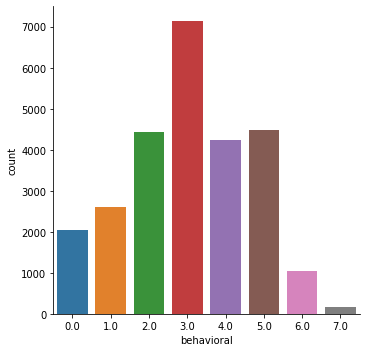

In [12]:
sns.factorplot('behavioral',kind = 'count',data = data)

# Missing Values

In [13]:
feature.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [14]:
test_feature.isnull().sum()

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

In [15]:
feature.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)
test_feature.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

In [16]:
my_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_feature = pd.DataFrame(my_imputer.fit_transform(feature))
imputed_test_feature = pd.DataFrame(my_imputer.transform(test_feature))

In [17]:
imputed_feature.columns = feature.columns
imputed_test_feature.columns = test_feature.columns

In [18]:
imputed_feature.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,1,1,0,1,0,0,0,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0
3,1,1,0,1,0,1,1,0,0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
4,2,1,0,1,0,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0


# Categorical Data

In [19]:
c_imputed_feature = imputed_feature.copy()
c_imputed_test_feature = imputed_test_feature.copy()

ohe = OneHotEncoder()

In [20]:
obj = (feature.select_dtypes(include ='object').columns).tolist()
obj

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [21]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), obj)], remainder='passthrough')
c_imputed_feature = np.array(ct.fit_transform(c_imputed_feature))
c_imputed_test_feature = np.array(ct.fit_transform(c_imputed_test_feature))

# Models

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [23]:
label

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [24]:
imputed_feature

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,1,1,0,1,0,0,0,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0
3,1,1,0,1,0,1,1,0,0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
4,2,1,0,1,0,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,0,1,0,0,0,1,0,0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0,0
26703,1,2,0,1,0,1,0,0,0,1,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1,0
26704,2,2,0,1,1,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0,0
26705,1,1,0,0,0,0,0,0,1,0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1,0


In [25]:
RandomSeed = 6

X_train, X_test, y_train, y_test = train_test_split(
    c_imputed_feature,
    label, 
    test_size =0.35,
    stratify = label,
    shuffle= True,
    random_state = RandomSeed
)

In [26]:
MLA = [linear_model.LogisticRegressionCV(),
       ensemble.RandomForestClassifier(),
       svm.LinearSVC(),
       XGBClassifier()    
       ]

In [27]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [28]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [29]:
MLA_predict = label['h1n1_vaccine']

In [30]:
label

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [31]:
h1n1 = label["h1n1_vaccine"][:26707]

In [32]:
c_imputed_feature

array([[0.0, 0.0, 0.0, ..., 2.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 4.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 2.0, 2.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 2.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 2.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 1.0, 1.0, 0.0]], dtype=object)

In [33]:
from sklearn import svm,ensemble

row_index = 0
c_imputed_feature1 = c_imputed_feature.copy()

for alg in MLA:
    c_imputed_feature = c_imputed_feature1
    
    MLA_name = alg.__class__.__name__
    print('Executing ',MLA_name)
    
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, c_imputed_feature, h1n1, cv  = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
  
    
    alg.fit(c_imputed_feature, h1n1)
    MLA_predict[MLA_name] = alg.predict(c_imputed_feature)
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

Executing  LogisticRegressionCV
Executing  RandomForestClassifier
Executing  LinearSVC
Executing  XGBClassifier


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Time
3,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.837764,1.77
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.834132,2.77133
2,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.832784,2.88485
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.832235,1.81628


In [34]:
from skmultilearn.problem_transform import BinaryRelevance

In [35]:
X_train = np.array(X_train, dtype=float)

In [36]:
def get_acc(clf,X,truth,s):
    pred = clf.predict_proba(X)
    pred = pred.toarray()
    accuracy = roc_auc_score(truth,pred)
    print(s+" Accuracy is : ",accuracy*100)

# Hyperparameters Optimization

## XGBoost 

In [37]:
param1 = {
            'learning_rate':     [0.01,0.1],
            'max_depth':         [2,3,4],
            'lambda':            [1.0,1.5],
            'subsample':        [0.1,0.2,0.3],
            'colsample_bytree': [0.3,0.5,0.6],
            'min_split_loss' :  [0.01,0.2],
            'min_split_size' : [2,4,6]
        }
classifier = XGBClassifier()
xgb = GridSearchCV(classifier, param1, n_jobs=-1, cv=2,verbose = True)

In [ ]:
clf = BinaryRelevance(classifier=xgb, require_dense=[True,True])
clf.fit(X_train, y_train)

get_acc(clf,X_test,y_test,'Cross Validation')
get_acc(clf,X_train,y_train,'Training')

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  3.6min finished


Fitting 2 folds for each of 648 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min


## Logistic Regression

In [52]:
param2 = {'C': [1,5,50]}

classifier = LogisticRegression(solver = "liblinear")
LR = GridSearchCV(classifier, param2, n_jobs=-1, cv=8,verbose = True)

clf = BinaryRelevance(classifier=LR, require_dense=[True,True])
clf.fit(X_train, y_train)

get_acc(clf,X_test,y_test,'Cross Validation')
get_acc(clf,X_train,y_train,'Training')

Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished


Cross Validation Accuracy is :  83.9647193357068
Training Accuracy is :  84.11581703128928


In [94]:
X_train_ = np.asarray(X_train).astype(np.float32)
X_test_ = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test_ = np.asarray(y_test).astype(np.float32)

## Neural Networks

In [78]:
import tensorflow as tf

In [96]:
def create_baseline():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
    model.add(tf.keras.layers.Dense(units = 32, activation='relu'))
    model.add(tf.keras.layers.Dense(units = 16,activation='relu'))
    model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model


estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_baseline, epochs=1000, batch_size=1024, verbose=0)

In [97]:
clf = BinaryRelevance(estimator, require_dense=[True,True])

In [98]:
clf.fit(X_train_, y_train)

BinaryRelevance(classifier=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CBB7685888>,
                require_dense=[True, True])

In [99]:
get_acc(clf,X_test_,y_test_,'Cross Validation')
get_acc(clf,X_train,y_train,'Training')

Cross Validation Accuracy is :  83.90770632826417
Training Accuracy is :  85.81182496632293


# Prediction

In [100]:
c_imputed_test_feature

array([[0.0, 1.0, 0.0, ..., 1.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, ..., 1.0, 3.0, 0.0],
       [0.0, 0.0, 0.0, ..., 4.0, 1.0, 0.0],
       ...,
       [1.0, 0.0, 0.0, ..., 1.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 2.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, ..., 2.0, 0.0, 0.0]], dtype=object)

In [101]:
c_imputed_test_feature_ = np.asarray(c_imputed_test_feature).astype(np.float32)
c_imputed_test_feature_

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 3., 0.],
       [0., 0., 0., ..., 4., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 2., 1., 0.],
       [0., 0., 1., ..., 2., 0., 0.]], dtype=float32)

In [103]:
prediction = clf.predict_proba(c_imputed_test_feature_)

In [104]:
prediction_df = pd.DataFrame.sparse.from_spmatrix(prediction)

In [105]:
adjust = prediction_df
adjust['respondent_id'] = adjust.index+26707 
adjust['h1n1_vaccine'] = adjust[0].astype('float64') 
adjust['seasonal_vaccine'] = adjust[1].astype('float64')
adjust.set_index('respondent_id') 
adjust.drop([0,1],axis=1,inplace=True) 
prediction_df = adjust 

In [106]:
prediction_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.048484,0.102651
1,26708,0.049064,0.036641
2,26709,0.628336,0.781422
3,26710,0.566124,0.876797
4,26711,0.365344,0.517123
...,...,...,...
26703,53410,0.351910,0.477926
26704,53411,0.134163,0.151063
26705,53412,0.179407,0.175650
26706,53413,0.040586,0.328354


In [107]:
prediction_df.to_csv('prediction_df.csv',index = False)